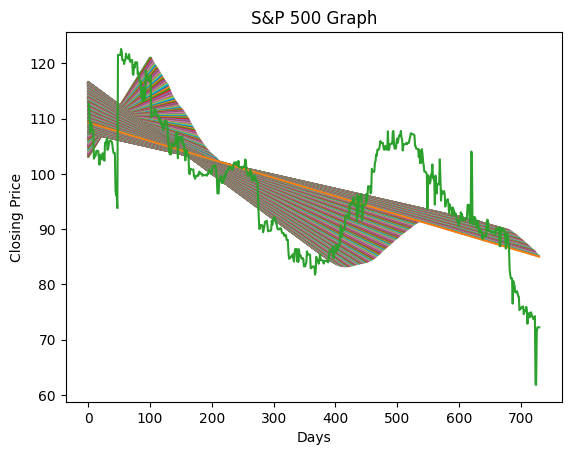

0.4152594996858977


In [17]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def findCoefficientA(x, y):
    x = np.array(x)
    y = np.array(y)

    crossN = np.sum(x*y)-np.size(x)*np.mean(x)*np.mean(y)
    crossD = np.sum(x*x)-np.size(x)*np.mean(x)*np.mean(x)

    a = crossN/crossD
    return a

def findCoefficientB(x, y, a):
    x = np.array(x)
    y = np.array(y)

    b = np.mean(y) - a*np.mean(x)
    return b

ds = pd.read_csv("datasets/sandp500.csv")

ds['Date'] = pd.to_datetime(ds['Date'])
ds = ds.sort_values(by = 'Date')

# x = []
# i = 0
# for val in ds['Date']:
#     x.append(i)
#     i=i+1

# y = []
# for val in ds['Close']:
#     y.append(val)

x = []
y = []
i = 0
for val in ds['Close']:
    if i >= 100:
        break
    x.append(i)
    y.append(val)
    i=i+1

for i, val in enumerate(ds['Close']):
    
    if i < 100:
        continue
    a = findCoefficientA(x,y)
    b = findCoefficientB(x,y,a)

    xx = np.array(x)
    y_pred = b+a*xx
    plt.plot(xx,y_pred)

    x.append(i)
    y.append(val)
    i=i+1


# a = findCoefficientA(x,y)
# b = findCoefficientB(x,y,a)

# x = np.array(x)
# y_pred = b+a*x
# plt.plot(x,y_pred)
    
a = findCoefficientA(x,y)
b = findCoefficientB(x,y,a)

xx = np.array(x)
y_pred = b+a*xx
plt.plot(xx,y_pred)

plt.plot(x, y)

plt.title("S&P 500 Graph")
plt.xlabel("Days")
plt.ylabel("Closing Price")

plt.show()

r2 = r2_score(y, y_pred)
print(r2)
